In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import os

from sklearn.metrics import classification_report
from keras.models import Model,load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers, losses,layers
from glob import glob 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model,load_model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers, losses,layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
train_path = 'drive/My Drive/recyclables/train'
valid_path = 'drive/My Drive/recyclables/valid'
test_path = 'drive/My Drive/recyclables/test'

##Simple CNN Model

In [6]:
#input image & batch size
batch_size = 32
img_height = 224
img_width = 224

In [7]:
entries = os.listdir(train_path)
for entry in entries:
  print(f'Categories in train path: {entry}')
print()

# entries = os.listdir(valid_path)
# for entry in entries:
#   print(f'Categories in valid path: {entry}')
# print()

# Number of images per category in test path
number1 = 0
entries = os.listdir(test_path+"/glass")
for entry in entries:
  number1 += 1
print(f'Number of glass images in test path: {number1}')

number1 = 0
entries = os.listdir(test_path+"/cardboard")
for entry in entries:
  number1 += 1
print(f'Number of cardboard images in test path: {number1}')

number1 = 0
entries = os.listdir(test_path+"/paper")
for entry in entries:
  number1 += 1
print(f'Number of paper images in test path: {number1}')

number1 = 0
entries = os.listdir(test_path+"/metal")
for entry in entries:
  number1 += 1
print(f'Number of metal images in test path: {number1}')

number1 = 0
entries = os.listdir(test_path+"/plastic")
for entry in entries:
  number1 += 1
print(f'Number of plastic images in test path: {number1}')
print()

# Number of images per category in train path
number1 = 0
entries = os.listdir(train_path+"/glass")
for entry in entries:
  number1 += 1
print(f'Number of glass images in training path: {number1}')

number1 = 0
entries = os.listdir(train_path+"/cardboard")
for entry in entries:
  number1 += 1
print(f'Number of cardboard images in training path: {number1}')

number1 = 0
entries = os.listdir(train_path+"/paper")
for entry in entries:
  number1 += 1
print(f'Number of paper images in training path: {number1}')

number1 = 0
entries = os.listdir(train_path+"/metal")
for entry in entries:
  number1 += 1
print(f'Number of metal images in training path: {number1}')

number1 = 0
entries = os.listdir(train_path+"/plastic")
for entry in entries:
  number1 += 1
print(f'Number of plastic images in training path: {number1}')
print()

# Number of images per category in valid path 

number1 = 0
entries = os.listdir(valid_path+"/glass")
for entry in entries:
  number1 += 1
print(f'Number of glass images in valid path: {number1}')

number1 = 0
entries = os.listdir(valid_path+"/cardboard")
for entry in entries:
  number1 += 1
print(f'Number of cardboard images in valid path: {number1}')

number1 = 0
entries = os.listdir(valid_path+"/paper")
for entry in entries:
  number1 += 1
print(f'Number of paper images in valid path: {number1}')

number1 = 0
entries = os.listdir(valid_path+"/metal")
for entry in entries:
  number1 += 1
print(f'Number of metal images in valid path: {number1}')

number1 = 0
entries = os.listdir(valid_path+"/plastic")
for entry in entries:
  number1 += 1
print(f'Number of plastic images in valid path: {number1}')

Categories in train path: plastic
Categories in train path: cardboard
Categories in train path: glass
Categories in train path: paper
Categories in train path: metal

Number of glass images in test path: 95
Number of cardboard images in test path: 98
Number of paper images in test path: 98
Number of metal images in test path: 95
Number of plastic images in test path: 93

Number of glass images in training path: 763
Number of cardboard images in training path: 789
Number of paper images in training path: 792
Number of metal images in training path: 768
Number of plastic images in training path: 748

Number of glass images in valid path: 95
Number of cardboard images in valid path: 99
Number of paper images in valid path: 99
Number of metal images in valid path: 96
Number of plastic images in valid path: 93


In [ ]:
print(os.listdir('drive/My Drive/recyclables'))

['train', 'test', 'valid', 'InceptionV3_model', 'VGG16_model', 'Resnet50_model', 'test_2', 'Basic_CNN', 'CDS Model Params Tuning.gdoc']


In [ ]:
train_count=0
valid_count=0
test_count=0

categories = glob(train_path+'/*')
for i in categories:
  train_count+=(len(os.listdir(i)))
  
categories = glob(valid_path+'/*')
for i in categories:
  valid_count+=(len(os.listdir(i)))

categories = glob(test_path+'/*')
for i in categories:
  test_count+=(len(os.listdir(i)))

print(f'Number of training samples:{train_count}')
print(f'Number of validation samples:{valid_count}')
print(f'Number of test samples:{test_count}')

Number of training samples:3860
Number of validation samples:482
Number of test samples:479


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=None,
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 3860 files belonging to 5 classes.


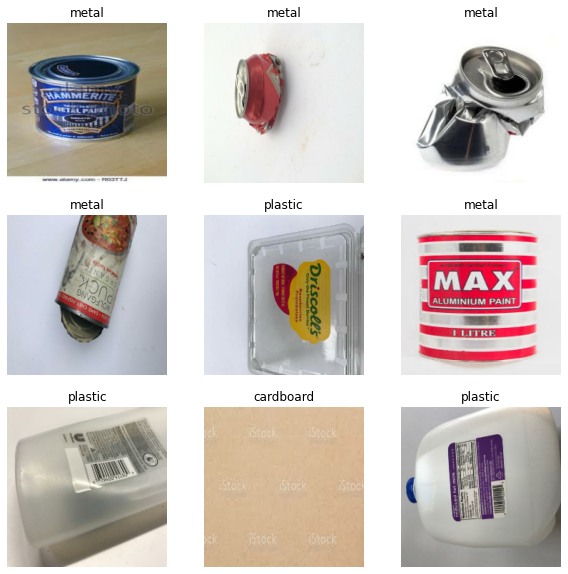

In [ ]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# data augmentation 
train_datagen = ImageDataGenerator(rescale = 1./255)
                                  #  ,shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  rotation_range=20,
                                  #  horizontal_flip = True,
                                  #  vertical_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

# number of training sets will be the total training data/batch size 
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# number of validation sets will be the total test data/batch size
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size =32,
                                            class_mode=None,
                                            shuffle=False)


Found 3860 images belonging to 5 classes.
Found 482 images belonging to 5 classes.
Found 479 images belonging to 5 classes.


In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   valid_path,
#   validation_split=None,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
# class_names = train_ds.class_names
# print(class_names)
# class_names2 = val_ds.class_names
# print(class_names2)

In [ ]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 5)


In [ ]:
train_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [ ]:
(train_set[0][0].shape)

(32, 224, 224, 3)

In [ ]:
# use buffered prefetching so you can yield data from disk without having I/O become blocking
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#normalizing RBG to between 0 to 1
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image)) 

In [9]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # contains image, filter and padding --> creates feature maps
  # filter will have the same depth of 3 since LGB
  layers.Conv2D(16, 3, padding='same', activation='relu'), 
  # feature map generated by previous convolution layers is now max pooled
  layers.AveragePooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  #flatten the tensor as there are multiple channels
  layers.Flatten(),
  # activation maps used are RELU
  # dense is otherwise known as fully connected layer
  layers.Dense(128, activation='relu'), 
  #layers.Dropout(0.2),
  layers.Dense(num_classes, activation="softmax")
])

In [10]:
model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy', #one hot encoding
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 28, 28, 64)        0

In [12]:
print(f'batches of training data:{len(train_set)}')
print(f'batches of validation data:{len(valid_set)}')

batches of training data:121
batches of validation data:16


In [13]:
r = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
121/121 [==============================] - 1170s 10s/step - loss: 1.6084 - accuracy: 0.2073 - val_loss: 1.6044 - val_accuracy: 0.2614
Epoch 2/30
121/121 [==============================] - 19s 158ms/step - loss: 1.5936 - accuracy: 0.2697 - val_loss: 1.5642 - val_accuracy: 0.3506
Epoch 3/30
121/121 [==============================] - 19s 160ms/step - loss: 1.5130 - accuracy: 0.3614 - val_loss: 1.4620 - val_accuracy: 0.3776
Epoch 4/30
121/121 [==============================] - 19s 156ms/step - loss: 1.4127 - accuracy: 0.4023 - val_loss: 1.3878 - val_accuracy: 0.4295
Epoch 5/30
121/121 [==============================] - 19s 157ms/step - loss: 1.3517 - accuracy: 0.4334 - val_loss: 1.3771 - val_accuracy: 0.4253
Epoch 6/30
121/121 [==============================] - 19s 156ms/step - loss: 1.3097 - accuracy: 0.4663 - val_loss: 1.3325 - val_accuracy: 0.4564
Epoch 7/30
121/121 [==============================] - 

In [ ]:
print(train_set)

In [14]:
name = 'BasicCNN_1'
model.save(f'drive/My Drive/recyclables/Basic_CNN/{name}')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/My Drive/recyclables/Basic_CNN/BasicCNN_1/assets


In [15]:
%matplotlib inline

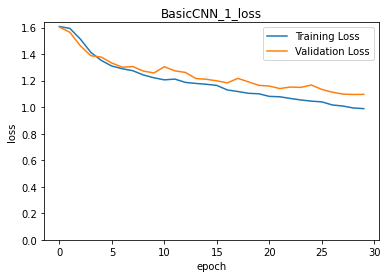

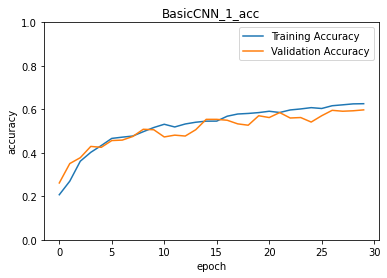

In [16]:
loss = name+'_loss'
acc = name+'_acc'
# loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim(ymin=0)
plt.title(loss,color='black')
plt.xlabel('epoch',color='black')
plt.ylabel('loss',color='black')
plt.tick_params(colors='black')
plt.savefig(f'drive/My Drive/recyclables/Basic_CNN/graphs/{loss}',dpi=100,bbox_inches = 'tight')
plt.show()
# accuracy

plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.ylim(ymin=0,ymax=1)
plt.title(acc,color='black')
plt.xlabel('epoch',color='black')
plt.ylabel('accuracy',color='black')
plt.tick_params(colors='black')

plt.savefig(f'drive/My Drive/recyclables/Basic_CNN/graphs/{acc}',dpi=100,bbox_inches = 'tight')
plt.show()

In [17]:
print(name)
BasicCNN_model = f'drive/My Drive/recyclables/Basic_CNN/{name}'
trained_model = load_model(BasicCNN_model)
y_pred = trained_model.predict(test_set)

BasicCNN_1


In [18]:
predicted_labels = np.argmax(y_pred,axis=1)    #predicted labels in one hot
true_labels = test_set.labels                  #true lables in one hot
label_names = [i for i in train_set.class_indices.keys()]  #label names



In [19]:
acc = np.count_nonzero(np.equal(predicted_labels,true_labels))/len(true_labels)
print(f'Accuracy of model on test data is {round(acc*100,2)}%\n')
# print(classification_report(true_labels,predicted_labels,target_names=label_names))
report = classification_report(true_labels,predicted_labels,target_names=label_names)
print(report)

Accuracy of model on test data is 60.33%

              precision    recall  f1-score   support

   cardboard       0.75      0.81      0.77        98
       glass       0.47      0.49      0.48        95
       metal       0.56      0.55      0.55        95
       paper       0.67      0.65      0.66        98
     plastic       0.57      0.51      0.53        93

    accuracy                           0.60       479
   macro avg       0.60      0.60      0.60       479
weighted avg       0.60      0.60      0.60       479



BasicCNN_1_cf_matrix


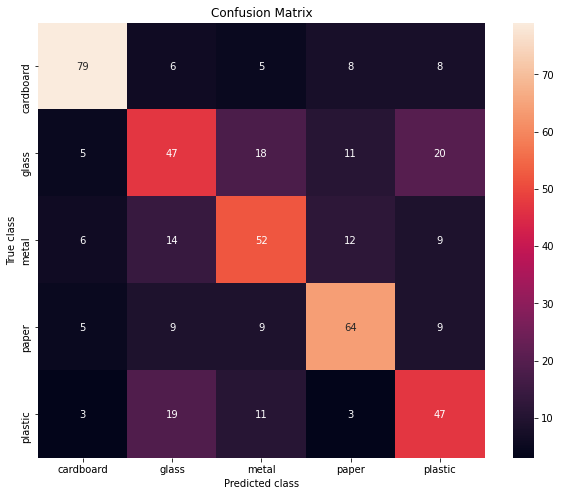

In [20]:
#confusion matrix

cf = name+'_cf_matrix'
print(cf)
cf_matrix = confusion_matrix(predicted_labels,true_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, xticklabels=label_names, yticklabels=label_names, annot=True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.savefig(f'drive/My Drive/recyclables/Basic_CNN/graphs/{cf}')
plt.show()